In [5]:
FILEPATH = "data/task_data/2021-11-22.json"
import json

from load_data import get_dataframe_from_json

with open(FILEPATH) as json_file:
    data = json.load(json_file)

In [6]:
len(data['tasks']['habits'])

56

0 ### Eat healthy / junk food ### id: ab2bb81e-4aa9-4ff6-aa96-d7ba0816b43f ###
up	:True
down	:True
counterUp	:0
counterDown	:0
type	:habit
notes	:
value	:8.985402106654922


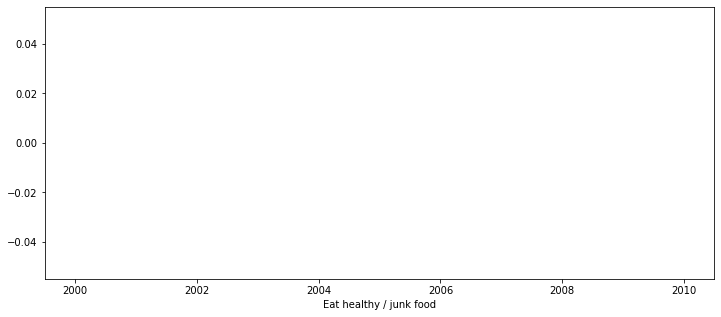

1 ### (+) stable / depressed (-)  ### id: 749eb7bf-6ec5-475e-a3aa-ec88f8fdfda1 ###
up	:True
down	:True
counterUp	:77
counterDown	:20
type	:habit
notes	:
value	:184.94607079116352


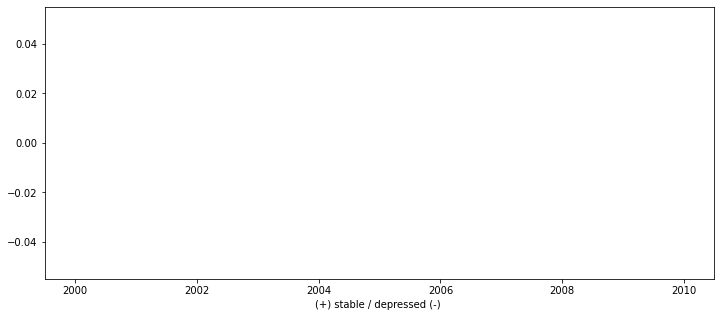

2 ### (+) stable / manic (-)  ### id: 9412ba80-286a-4bc5-a6c5-696611745379 ###
up	:True
down	:True
counterUp	:79
counterDown	:18
type	:habit
notes	:
value	:217.55793865001323


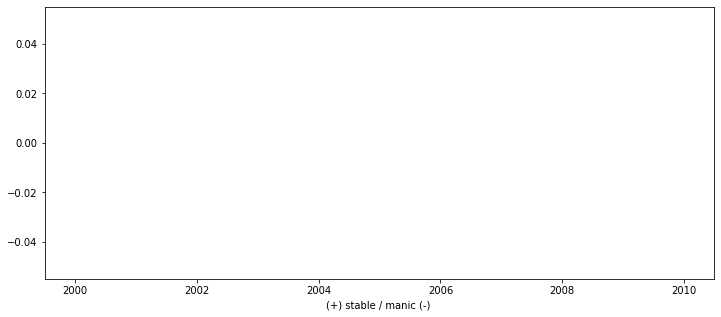

3 ### Mj 🍁 ### id: b397d7f8-3ace-454a-ab5b-7006f329ddf8 ###
up	:False
down	:True
counterUp	:0
counterDown	:0
type	:habit
notes	:
value	:-5.542325542354805


/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 127809 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 127809 missing from current font.
  font.set_text(s, 0, flags=flags)


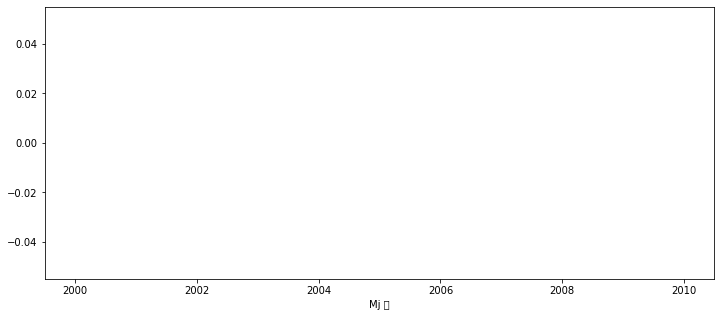

4 ### Alcohol 🍺 ### id: cc2f2af5-50b7-4581-bc46-71e81f812c86 ###
up	:False
down	:True
counterUp	:0
counterDown	:0
type	:habit
notes	:
value	:-5.100786344530329


/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 127866 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 127866 missing from current font.
  font.set_text(s, 0, flags=flags)


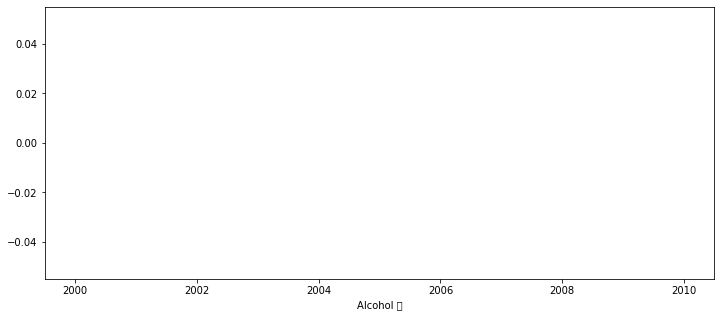

5 ### Exercise ### id: 518c1866-4f4a-4846-b607-c0e3369b6ea9 ###
up	:True
down	:False
counterUp	:1
counterDown	:0
type	:habit
notes	:
value	:1


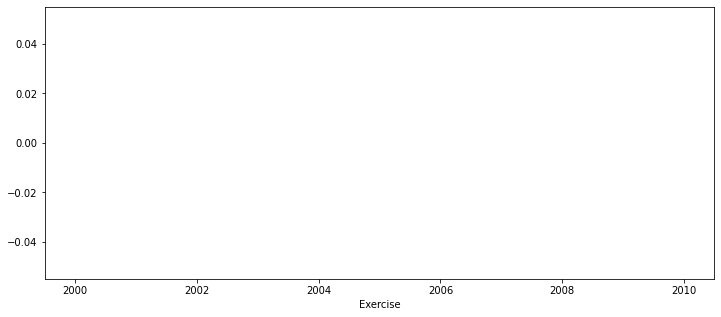

6 ### Tobacco ### id: be269eae-80e5-47fd-b79d-8527d32087c4 ###
up	:False
down	:True
counterUp	:0
counterDown	:0
type	:habit
notes	:
value	:0


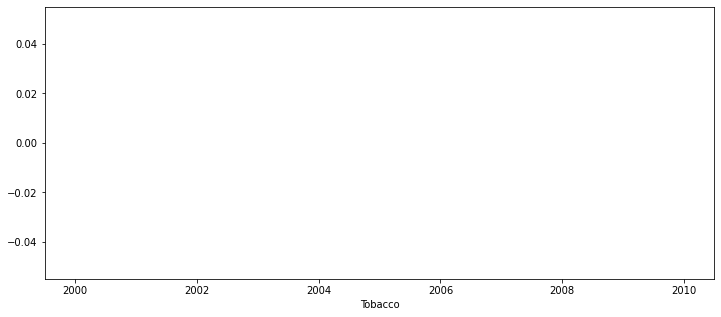

7 ### slept well / poorly ### id: cd7a912d-ecd1-40fe-8ba1-9e1075d68f99 ###
up	:True
down	:True
counterUp	:6
counterDown	:8
type	:habit
notes	:
value	:-45.856343150678406


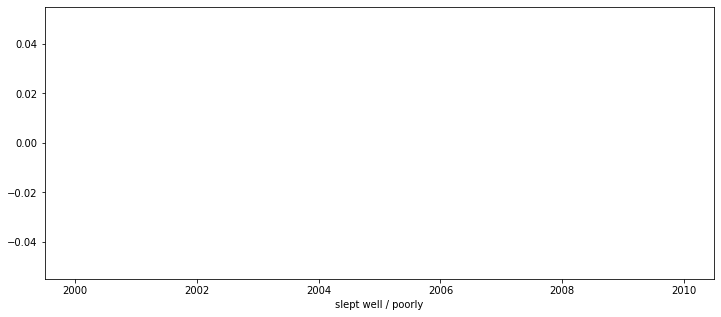

8 ### sex / masturbation ### id: a91d447a-891d-4f32-add8-4f6dc2e354f1 ###
up	:True
down	:True
counterUp	:1
counterDown	:3
type	:habit
notes	:
value	:84.97117370866114


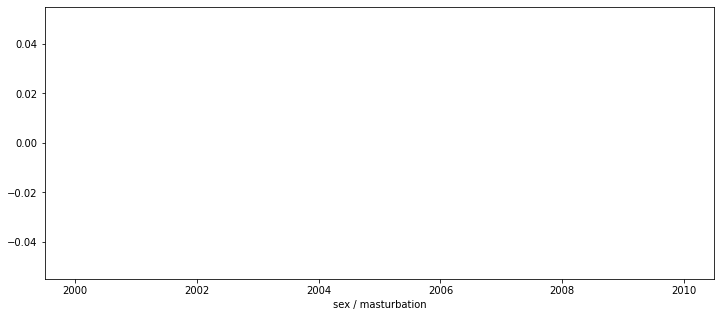

9 ### Tea / coffee ☕ ### id: 753894fb-a70a-4048-a285-1f92010ed434 ###
up	:True
down	:True
counterUp	:0
counterDown	:1
type	:habit
notes	:
value	:-744.982624474691


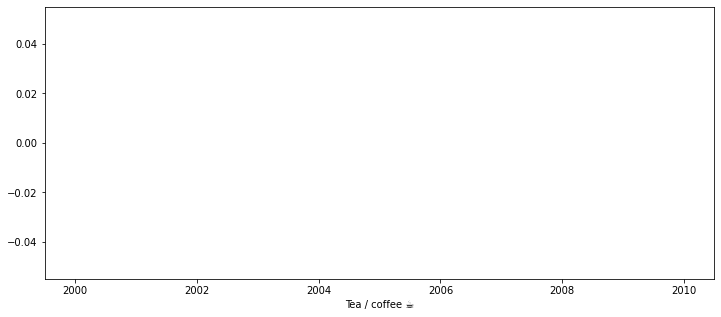

10 ### Caffeine ☕ ### id: c0a368a5-f346-4bed-a8e2-46ffc14c9cc4 ###
up	:False
down	:True
counterUp	:0
counterDown	:1
type	:habit
notes	:
value	:-3.905807654975367


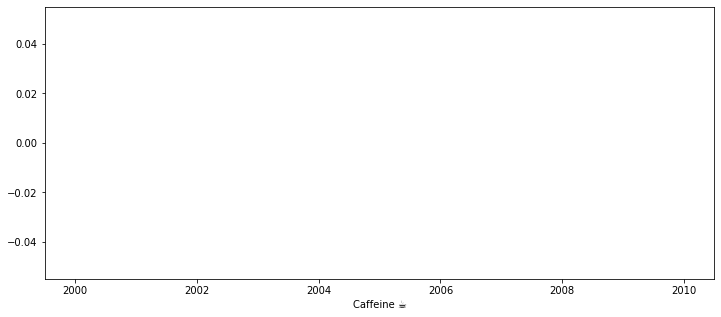

11 ### 🌕 Lamotrigine 100mg ### id: 10f97c1c-46c8-4c12-adb9-ef11d10e671b ###
up	:True
down	:False
counterUp	:1
counterDown	:0
type	:habit
notes	:
value	:1.957564553288925


/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 127765 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/srv/conda/envs/notebook/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 127765 missing from current font.
  font.set_text(s, 0, flags=flags)


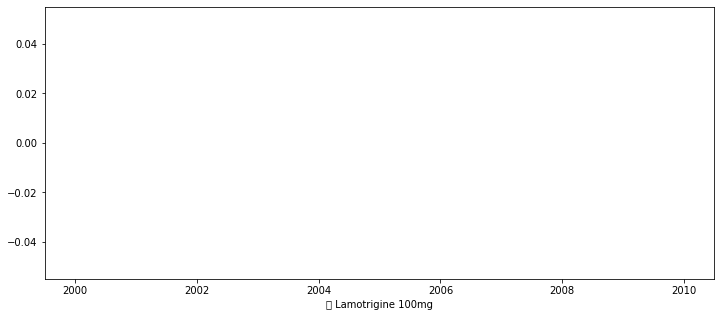

12 ### ☀️Escitalopram 10mg ### id: 87f791b4-16fe-4932-8fba-21ef23a118fa ###
up	:True
down	:False
counterUp	:0
counterDown	:0
type	:habit
notes	:
value	:0.663373783084585


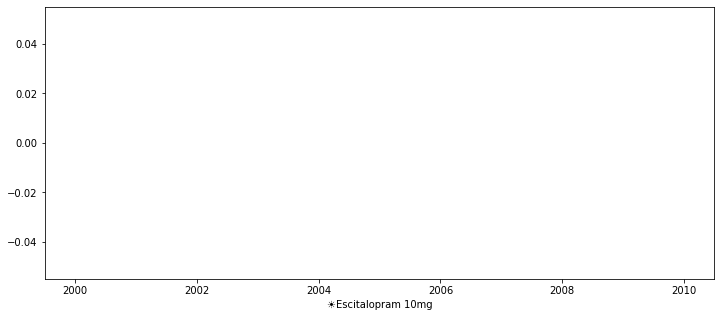

13 ### # choices ### id: 115f6f18-d44e-4476-997c-25a8cd844c6e ###


In [7]:
# habit_json = data['tasks']['habits'][0]
counter = 0
for habit_json in data['tasks']['habits']:
    habit_name = habit_json['text']
    print(f"{counter} ### {habit_name} ### id: {habit_json['id']} ###")
    counter += 1
    # skip entries with no data
    if habit_json['up'] is False and habit_json['down'] is False:
        break
 
    for key in ['up', 'down', 'counterUp', 'counterDown', 'type', 'notes', 'value']:
        print(f"{key}\t:{habit_json[key]}")
    json_dict = habit_json['history']
    dataframe = get_dataframe_from_json(json_dict)
    del dataframe['value']
    del dataframe['date']

    import seaborn
    import matplotlib.pyplot as plt

    # set figure size
    plt.figure( figsize = ( 12, 5))

    # plot a simple time series plot
    seaborn.scatterplot(
         data = dataframe,
    )

    plt.xlabel(habit_name)

    # computing a 7 day rolling average
    mean_win_size = 7
    dataframe[ f'up_{mean_win_size}d_avg' ] = dataframe['scoredUp'].rolling(mean_win_size).mean()
    dataframe[ f'down_{mean_win_size}d_avg' ] = dataframe['scoredDown'].rolling(mean_win_size).mean()
    # viewing the dataset
    # display(dataframe.head(10))
    plt.plot(dataframe[f'up_{mean_win_size}d_avg'], color='b')
    plt.plot(dataframe[f'down_{mean_win_size}d_avg'], color='r')
    plt.show()


In [4]:
display(
    dataframe
    # data['tasks']['habits'][0]['history']
)

,scoredUp,scoredDown,up_7d_avg,down_7d_avg
date,,,,
